# Predicting the sales using Linear Regression

Lets import the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the files

In [2]:
train=pd.read_csv('C:\\Users\\shweta.thakre\\Desktop\\ML(100days)\\Dataset\\Big_Mart_train.csv')
test=pd.read_csv('C:\\Users\\shweta.thakre\\Desktop\\ML(100days)\\Dataset\\Big_Mart_test.csv')

In [3]:
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Conculsion: \
    1. There are 12 columns and 8523 records.\
    2. Lets classify the columns on bases of Numerical and Categorical.\
            i . Item_Identifier, Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size ,Outlet_Location_Type, Outlet_Type are categorical columns.\
            ii . Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales are numerical columns

In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [7]:
# Lets have a look on categorical columns
train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [8]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [9]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [10]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [12]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Lets See the column details: \
    1. Item_Identifier:\  -  total unique values are 1559. \
                          -  Does not contain Null Values. \
                          -  FD== food, NC==Non-Consumable, DR==Drinks\
    2. Item_Fat_Content:\ -  It has 5 different categories as Low Fat,Regular,reg,LF,low fat. If we have a close look on this categories, we can say that Low Fat==LF==low fat and reg==Regular\
                          -  We can classify the Item_Fat_Contents in two cateries Low Fat and Regular.\
    3. Item_Type:\        -  There are 16 different item types.\
    4. Outlet_Size: \     -  Contains NULL value.\
                          -  Contains three different categories. Small, Medium and High.\
    5. Outlet_Location_Type:\ -No Null Value. It basically gives the type of outlet location.\
    6. Outlet_Type:\      -  No Null Value. It has 4 categories.\ 
                        -    Outlet location type and outlet type are related to each other.

# NUMERICAL COLUMNS

In [13]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
train['Item_Weight'].nunique()

415

C:\Users\shweta.thakre\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


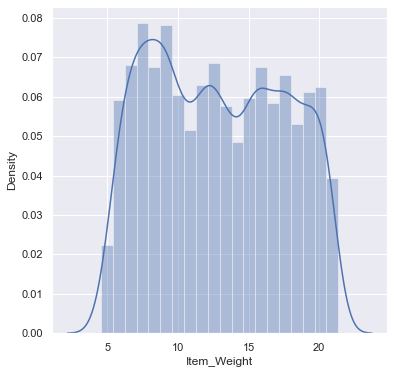

In [15]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Weight'])
plt.show()

C:\Users\shweta.thakre\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


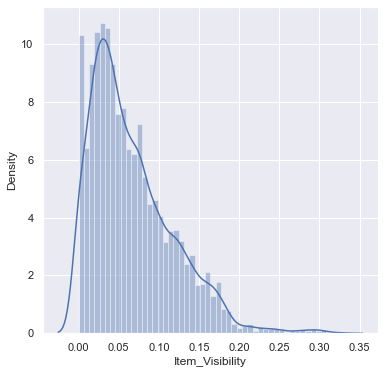

In [16]:
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Visibility'])
plt.show()

C:\Users\shweta.thakre\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

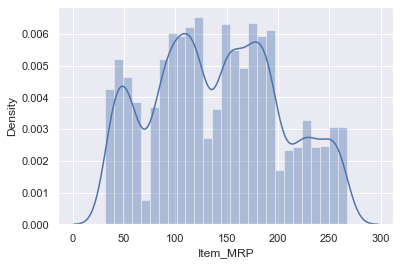

In [17]:
sns.distplot(train['Item_MRP'])

C:\Users\shweta.thakre\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

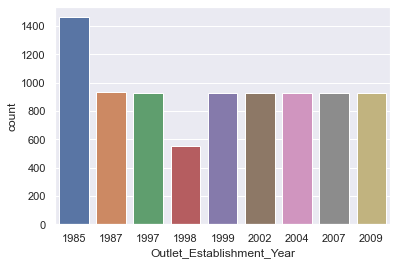

In [18]:
sns.countplot(train['Outlet_Establishment_Year'],data=train)

1. Item_Weight: \- It contains the Null Values.\
                 - It gives the weight of the object.\
                 - Minimum weight is 4.55 and max weight is 21.35. \
                 - We can concluded that weight cannot be less than 4.54 and cannot exceed then 21.35.\
2. Item_Visibility :\ - It does not conatin NULL value.\
                       - Some values are Zero, if it is zero the customer can't buy that item.
3. Item_MRP: \ - It does not conatin NULL value.\
                - Minimum MRP of an item is 31 and max is 266.\
4. Outlet_Establishment_Year:\ - Show when the outlet was established.\
5. Item_Outlet_Sales:\ - targeted column.

# Pre-Processing

In [19]:
# Lets join the test and train dataset.
# We are combining the two dataset because whatever preprocessing steps we are going to perform on train dataset the same are needed to perform on test dataset
train['data']='train'
test['data']='test'

In [20]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train


In [21]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,data
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test


In [22]:
df=pd.concat([train,test])

In [23]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  data                       14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [25]:
#lets check for the missing value in percentage
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
data                          0.000000
dtype: float64

C:\Users\shweta.thakre\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

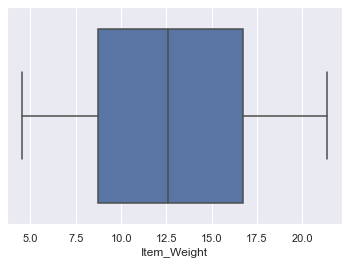

In [26]:
# Lets check for outlier
sns.boxplot('Item_Weight',data=df)

As there are no outlier we can go with mean.

In [27]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

Outlet_size is a categorical data hence we will use mode to fill the na value

In [28]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [29]:
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')

In [30]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
data                            0
dtype: int64

In [31]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Here we can say that Low Fat,LF and low fat are LOW FAT so lets replace LF and low fat with Low Fat. reg is nothing but Regular, lets replace reg with Regular

In [32]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

# Feature Engineering - Fetaure Construction

In [33]:
# As we have Outlet_Establishment Year from that we can calculate from how many years the outlet is running
df['Outlet in years']=2023 - df['Outlet_Establishment_Year']

In [34]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data,Outlet in years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14


# ENCODING 

In [35]:
df['Outlet_Size'].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [36]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [37]:
df['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [38]:
df['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [39]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                14204 non-null  object 
 1   Item_Weight                    14204 non-null  float64
 2   Item_Visibility                14204 non-null  float64
 3   Item_Type                      14204 non-null  object 
 4   Item_MRP                       14204 non-null  float64
 5   Outlet_Identifier              14204 non-null  object 
 6   Outlet_Establishment_Year      14204 non-null  int64  
 7   Item_Outlet_Sales              8523 non-null   float64
 8   data                           14204 non-null  object 
 9   Outlet in years                14204 non-null  int64  
 10  Item_Fat_Content_Low Fat       14204 non-null  uint8  
 11  Item_Fat_Content_Regular       14204 non-null  uint8  
 12  Outlet_Size_High               14204 non-null  

In [41]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [42]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [43]:
df['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
encoder=LabelEncoder()

In [46]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

In [47]:
df['Item_Type']=encoder.fit_transform(df['Item_Type'])

In [48]:
df['Outlet_Identifier']=encoder.fit_transform(df['Outlet_Identifier'])

In [49]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,data,Outlet in years,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.016047,4,249.8092,9,1999,3735.1380,train,24,...,0,1,0,1,0,0,0,1,0,0
1,8,5.92,0.019278,14,48.2692,3,2009,443.4228,train,14,...,0,1,0,0,0,1,0,0,1,0
2,662,17.50,0.016760,10,141.6180,9,1999,2097.2700,train,24,...,0,1,0,1,0,0,0,1,0,0
3,1121,19.20,0.000000,6,182.0950,0,1998,732.3800,train,25,...,0,1,0,0,0,1,1,0,0,0
4,1297,8.93,0.000000,9,53.8614,1,1987,994.7052,train,36,...,1,0,0,0,0,1,0,1,0,0


In [50]:
#Lets drop a column from dummies
df.drop(columns=['Item_Fat_Content_Regular','Outlet_Size_Small','Outlet_Location_Type_Tier 1','Outlet_Type_Grocery Store'],axis=1,inplace=True)

In [51]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,data,Outlet in years,Item_Fat_Content_Low Fat,Outlet_Size_High,Outlet_Size_Medium,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.016047,4,249.8092,9,1999,3735.1380,train,24,1,0,1,0,0,1,0,0
1,8,5.92,0.019278,14,48.2692,3,2009,443.4228,train,14,0,0,1,0,1,0,1,0


# Spliting the train and test data.

In [52]:
# Lets spearate the train and test data set
train_df=df[df['data']=='train']

In [53]:
test_df=df[df['data']=='test']

In [54]:
train_df.head(3)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,data,Outlet in years,Item_Fat_Content_Low Fat,Outlet_Size_High,Outlet_Size_Medium,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.016047,4,249.8092,9,1999,3735.1380,train,24,1,0,1,0,0,1,0,0
1,8,5.92,0.019278,14,48.2692,3,2009,443.4228,train,14,0,0,1,0,1,0,1,0
2,662,17.50,0.016760,10,141.6180,9,1999,2097.2700,train,24,1,0,1,0,0,1,0,0


In [55]:
test_df.head(3)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,data,Outlet in years,Item_Fat_Content_Low Fat,Outlet_Size_High,Outlet_Size_Medium,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1114,20.75,0.007565,13,107.8622,9,1999,NaN,test,24,1,0,1,0,0,1,0,0
1,1078,8.30,0.038428,4,87.3198,2,2007,NaN,test,16,0,0,1,1,0,1,0,0
2,1420,14.60,0.099575,11,241.7538,0,1998,NaN,test,25,1,0,1,0,1,0,0,0


In [56]:
# lets remove the data column from both the dataset
train_df.drop('data',axis=1,inplace=True)

C:\Users\shweta.thakre\AppData\Local\Temp\ipykernel_15292\1117534412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop('data',axis=1,inplace=True)


In [57]:
train_df.sample(2)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet in years,Item_Fat_Content_Low Fat,Outlet_Size_High,Outlet_Size_Medium,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1174,166,16.10,0.047802,5,127.4362,8,1997,2265.0516,26,0,0,0,0,0,1,0,0
8253,55,8.88,0.000000,7,154.0682,3,2009,2896.8958,14,1,0,1,0,1,0,1,0


In [58]:
test_df.drop('data',axis=1,inplace=True)

C:\Users\shweta.thakre\AppData\Local\Temp\ipykernel_15292\4174745428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop('data',axis=1,inplace=True)


In [59]:
test_df.sample(2)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet in years,Item_Fat_Content_Low Fat,Outlet_Size_High,Outlet_Size_Medium,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3133,1010,7.560,0.06387,5,154.563,9,1999,NaN,24,1,0,1,0,0,1,0,0
1702,352,10.895,0.02699,5,107.728,3,2009,NaN,14,1,0,1,0,1,0,1,0


In [60]:
test_df.drop('Item_Outlet_Sales',axis=1,inplace=True)

C:\Users\shweta.thakre\AppData\Local\Temp\ipykernel_15292\617545924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop('Item_Outlet_Sales',axis=1,inplace=True)


# Spliting the data as Independent and dependent Variable.

In [61]:
# lets split the data as independent variable and dependent variable
x=train_df.drop(columns=['Item_Outlet_Sales'],axis=1)

In [62]:
y=train_df['Item_Outlet_Sales']

In [63]:
x.head(3)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet in years,Item_Fat_Content_Low Fat,Outlet_Size_High,Outlet_Size_Medium,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.016047,4,249.8092,9,1999,24,1,0,1,0,0,1,0,0
1,8,5.92,0.019278,14,48.2692,3,2009,14,0,0,1,0,1,0,1,0
2,662,17.50,0.016760,10,141.6180,9,1999,24,1,0,1,0,0,1,0,0


In [64]:
y.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

# Train Test Split

In [65]:
# Lets split the data into train and test.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [66]:
# let check the shape
print("The shape of X Train is :- ",x_train.shape)
print("*"*10)
print("The shape of X Test is :- ",x_test.shape)
print("*"*10)
print("The shape of Y Train is :- ",y_train.shape)
print("*"*10)
print("The shape of Y Test is :- ",y_test.shape)


The shape of X Train is :-  (6818, 16)
**********
The shape of X Test is :-  (1705, 16)
**********
The shape of Y Train is :-  (6818,)
**********
The shape of Y Test is :-  (1705,)


# Model Building

In [67]:
from sklearn.linear_model import LinearRegression
model_lin=LinearRegression()
model_lin.fit(x_train,y_train)
y_pred=model_lin.predict(x_test)

In [68]:
y_pred

array([1345.43689714, 2417.23736223, 1324.21832946, ..., 1026.84657918,
       1592.39863988, 2409.84128215])

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5579169654536316

# Predicting the Test DataSet

In [70]:
# predict the testing data
y_hat = model_lin.predict(test_df)

In [71]:
test_df['prediction'] = y_hat

C:\Users\shweta.thakre\AppData\Local\Temp\ipykernel_15292\2790330134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['prediction'] = y_hat


In [72]:
test_df.head(2)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet in years,Item_Fat_Content_Low Fat,Outlet_Size_High,Outlet_Size_Medium,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,prediction
0,1114,20.75,0.007565,13,107.8622,9,1999,24,1,0,1,0,0,1,0,0,1850.391445
1,1078,8.30,0.038428,4,87.3198,2,2007,16,0,0,1,1,0,1,0,0,1608.491698


In [76]:
# Gives summary of data model->gives value of r-square and adjusted r-square
import statsmodels.api as sm
X_opt = train_df.iloc[:, :-1]
Y1 = train_df.iloc[:, -1]
 
 
regressor_OLS = sm.OLS(endog = Y1, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Outlet_Type_Supermarket Type3   R-squared:                       0.957
Model:                                       OLS   Adj. R-squared:                  0.957
Method:                            Least Squares   F-statistic:                 1.275e+04
Date:                           Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                                   15:06:49   Log-Likelihood:                 11271.
No. Observations:                           8523   AIC:                        -2.251e+04
Df Residuals:                               8507   BIC:                        -2.240e+04
Df Model:                                     15                                         
Covariance Type:                       nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Item_Identifier               -1.889e-06   1.57e-06     -1.203      0.229   -4.97e-06    1.19e-06
Item_Weight                       0.0001      0.000      0.762      0.446      -0.000       0.000
Item_Visibility                  -0.0640      0.014     -4.520      0.000      -0.092      -0.036
Item_Type                         0.0001      0.000      0.738      0.460      -0.000       0.000
Item_MRP                         -0.0002   1.46e-05    -14.588      0.000      -0.000      -0.000
Outlet_Identifier                -0.0558      0.001    -68.435      0.000      -0.057      -0.054
Outlet_Establishment_Year        -0.0015   8.48e-06   -177.483      0.000      -0.002      -0.001
Item_Outlet_Sales              1.358e-05   6.02e-07     22.545      0.000    1.24e-05    1.48e-05
Outlet in years                   0.0853      0.000    178.449      0.000       0.084       0.086
Item_Fat_Content_Low Fat      -9.747e-05      0.001     -0.065      0.948      -0.003       0.003
Outlet_Size_High                 -2.2294      0.014   -162.785      0.000      -2.256      -2.203
Outlet_Size_Medium                0.0757      0.002     38.102      0.000       0.072       0.080
Outlet_Location_Type_Tier 2       0.3418      0.003    131.082      0.000       0.337       0.347
Outlet_Location_Type_Tier 3       0.8935      0.005    197.705      0.000       0.885       0.902
Outlet_Type_Supermarket Type1     1.3127      0.011    124.977      0.000       1.292       1.333
Outlet_Type_Supermarket Type2     1.0340      0.010    108.453      0.000       1.015       1.053
==============================================================================
Omnibus:                     1210.080   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              539.556
Skew:                          -0.442   Prob(JB):                    6.87e-118
Kurtosis:                       2.141   Cond. No.                     9.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""